# Data Visualization
This notebook presents the data analysis and visualization with **pandas**, **Matplotlib**, and **Seaborn**.

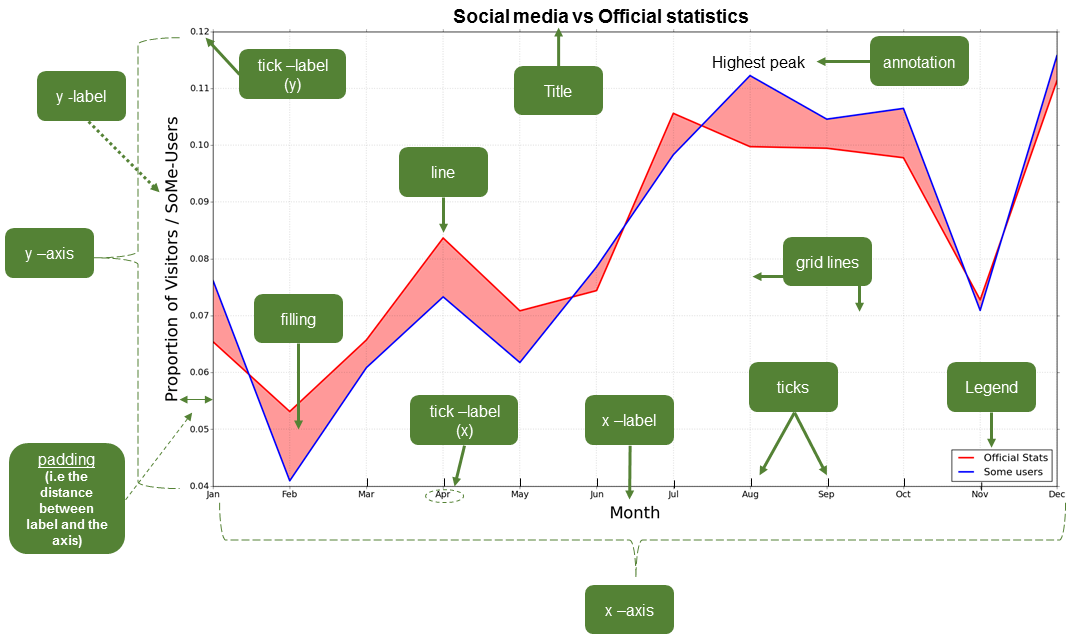

In [1]:
from IPython import display
display.Image("./Graph_Anatomy.png", width=800, height=800)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading data

In [8]:
movies = pd.read_csv('../movielens/movies.csv')
tags = pd.read_csv('../movielens/tags.csv', sep=',')
ratings = pd.read_csv('../movielens/ratings.csv', sep=',')

## 1. Bar Chart

### What are the most rated movies ?

In [9]:
ratings.head(), movies.head()

(   userId  movieId  rating   timestamp
 0       1      296     5.0  1147880044
 1       1      306     3.5  1147868817
 2       1      307     5.0  1147868828
 3       1      665     5.0  1147878820
 4       1      899     3.5  1147868510,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

In [10]:
merged_df = ratings.merge(movies[['movieId', 'title']], on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994)
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,1,665,5.0,1147878820,Underground (1995)
4,1,899,3.5,1147868510,Singin' in the Rain (1952)


In [11]:
# top10_counts = (
#     ratings.merge(movies[['movieId','title']], on='movieId')
#            .groupby('title', as_index=False)
#            .agg(num_ratings=('rating','count'))
#            .sort_values('num_ratings', ascending=False)
#            .head(10)
# )
top10_counts = (merged_df.groupby('title', as_index=False)
                .agg(num_ratings = ('rating', 'count'))
                .sort_values('num_ratings', ascending=False)
                .head(10))

top10_counts

,title,num_ratings
17622,Forrest Gump (1994),81491
41782,"Shawshank Redemption, The (1994)",81482
37867,Pulp Fiction (1994),79672
42216,"Silence of the Lambs, The (1991)",74127
30477,"Matrix, The (1999)",72674
43927,Star Wars: Episode IV - A New Hope (1977),68717
25275,Jurassic Park (1993),64144
40816,Schindler's List (1993),60411
7587,Braveheart (1995),59184
16751,Fight Club (1999),58773


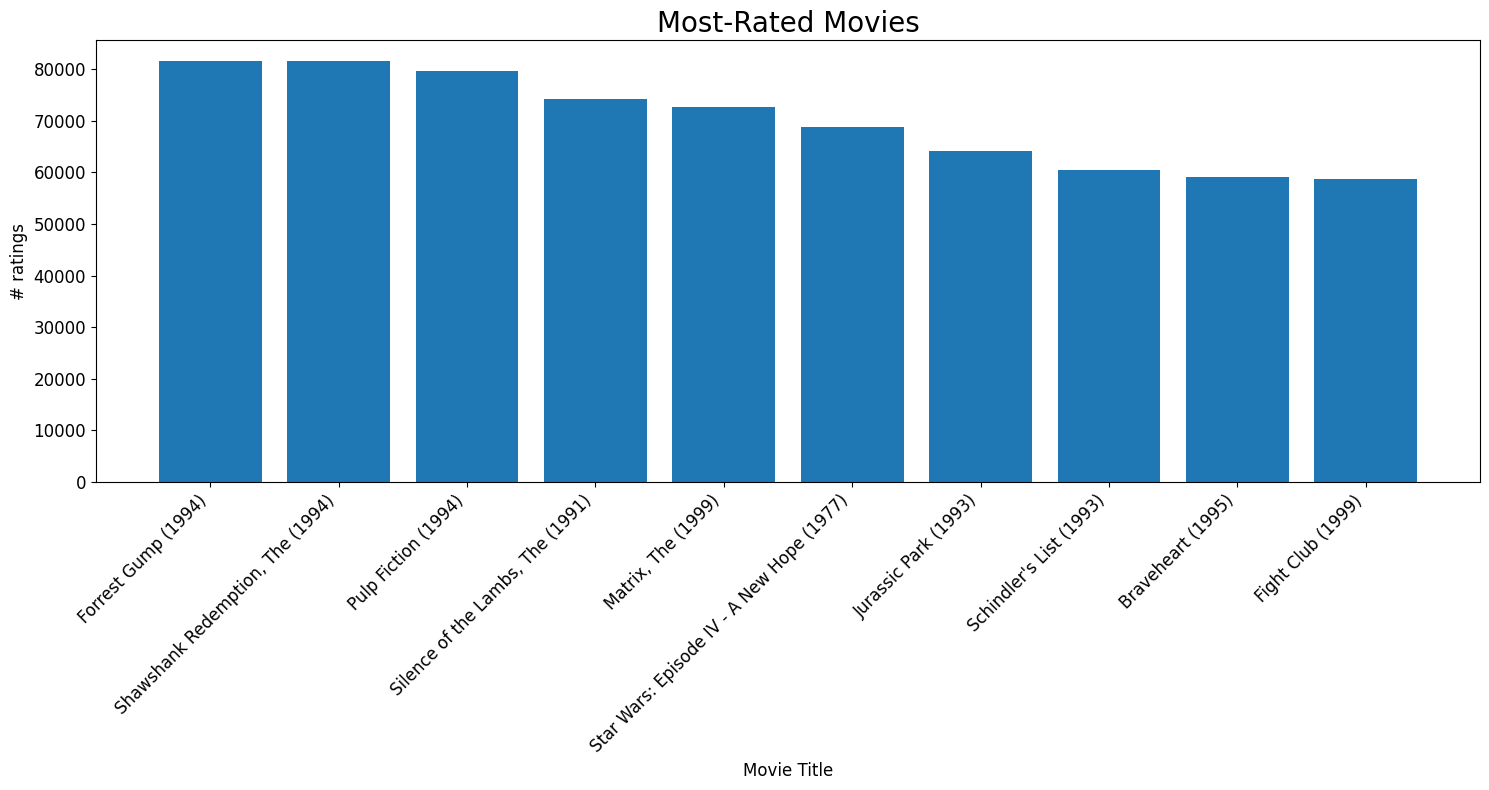

In [12]:
plt.figure(figsize=(15,8))
plt.bar(top10_counts['title'], top10_counts['num_ratings'])
plt.title('Most-Rated Movies', fontsize=20)
plt.ylabel('# ratings', fontsize=12)
plt.xlabel('Movie Title', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
#Set theme for the visualization
sns.set_theme(style="whitegrid", context="notebook")  # we'll override manually
# Choose one pleasant colour for all Seaborn charts
one_colour = sns.color_palette("crest", 1)[0]

Figure saved → figures/most_rated_movies.png


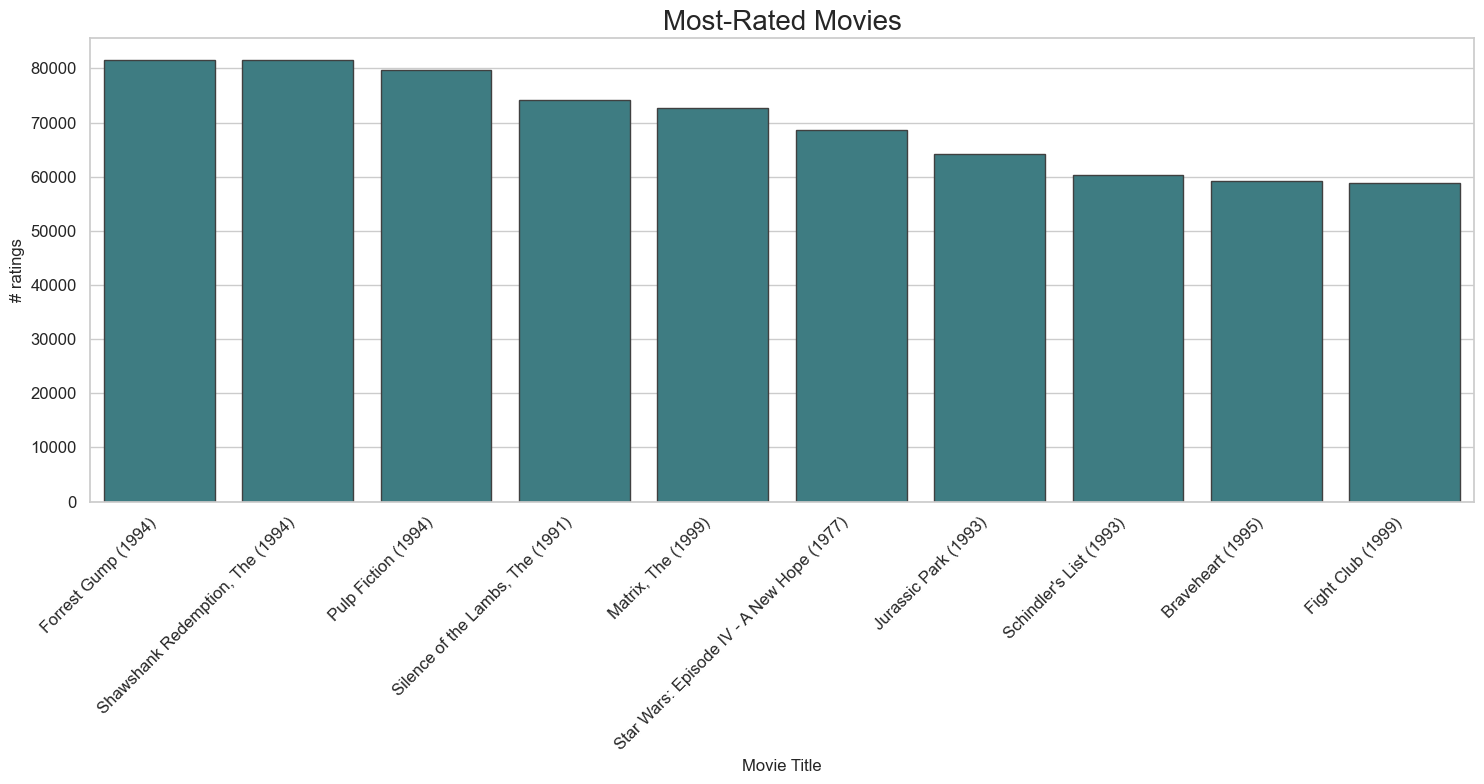

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(data=top10_counts, x='title', y='num_ratings',
                 color=one_colour, edgecolor='0.25')
plt.title('Most-Rated Movies', fontsize=20)
plt.ylabel('# ratings', fontsize=12)
plt.xlabel('Movie Title', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

######Save a graph to a directory. If the directory does not exist, a new folder will be created automatically.#############
save_dir   = "figures"          # your folder path
file_name  = "most_rated_movies.png"
full_path  = os.path.join(save_dir, file_name)

os.makedirs(save_dir, exist_ok=True)           # create folder tree if missing
plt.savefig(full_path, dpi=300, bbox_inches="tight") # bbox_inches="tight" : trims extra whitespace around the axes.

print(f"Figure saved → {full_path}")
############################################################################################################################

plt.show()

### About plt.tight_layout()

It helps ensure that the whole graph is fully fit in the boundary of the figure so that nothing important is cut off.

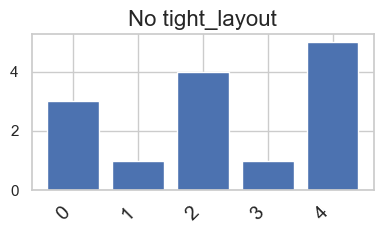

In [15]:
#Why plt.tight_layout() ? 

plt.figure(figsize=(4, 2.5))
plt.bar([0,1,2,3,4], [3, 1, 4, 1, 5])
plt.xticks(rotation=45, ha='right', fontsize=14)       
plt.title("No tight_layout", fontsize=16)
plt.savefig("no_tight_layout.png", dpi=150) 

plt.tight_layout()
plt.savefig("with_tight_layout.png", dpi=150) 

## Practice: What are the Top‑15 most frequently used Tags in the dataset?

In [16]:
# Find the top‑15 most frequently used Tags in the dataset
# tags.head(15)

# Insert your code here...
frequent_tags = tags['tag'].value_counts().reset_index().sort_values('count', ascending=False).head(15)
frequent_tags

,tag,count
0,sci-fi,8330
1,atmospheric,6516
2,action,5907
3,comedy,5702
4,surreal,5326
5,based on a book,5079
6,twist ending,4820
7,funny,4738
8,visually appealing,4526
9,dystopia,4257


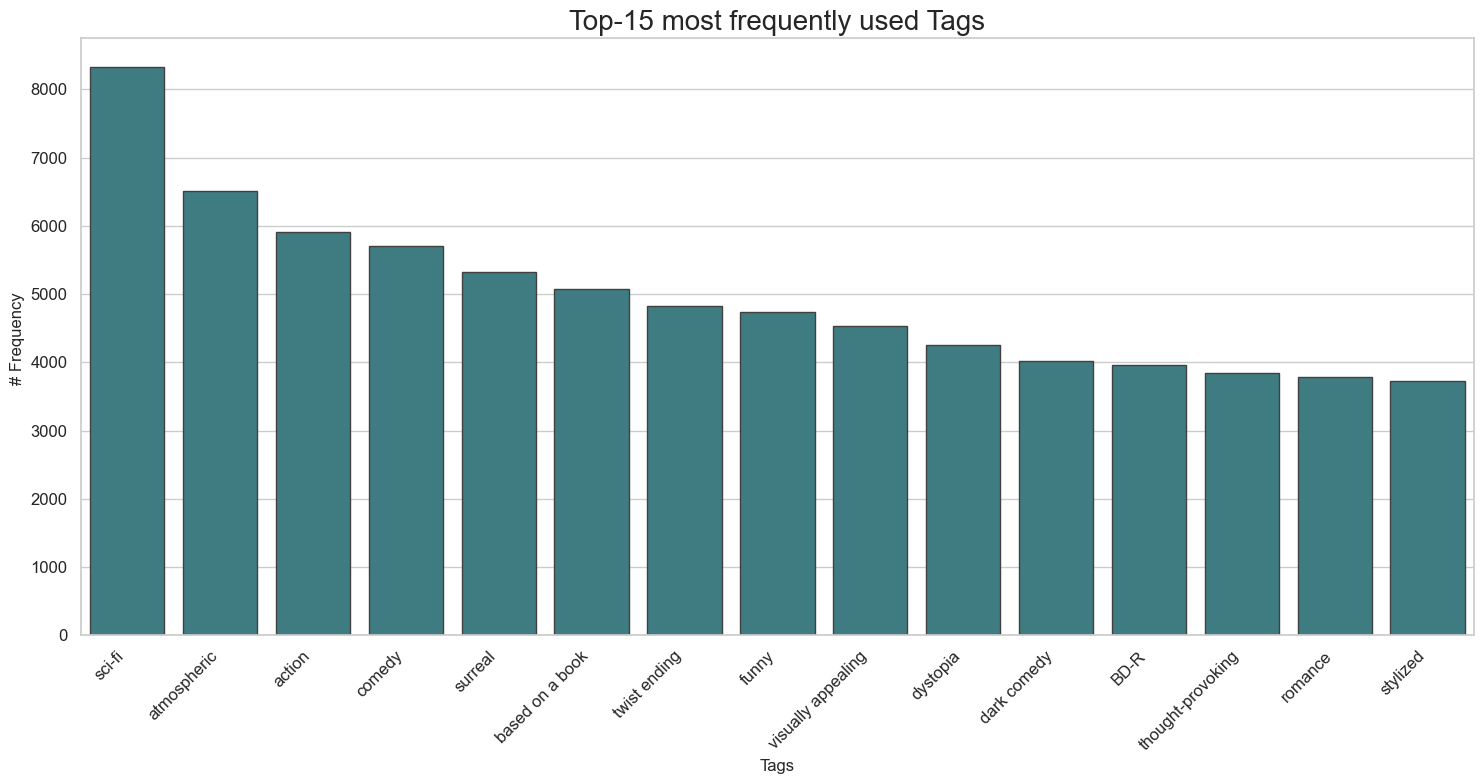

In [17]:
# Construct the bar chart

# Insert your code here
plt.figure(figsize=(15,8))
sns.barplot(data=frequent_tags, x='tag', y='count',
                 color=one_colour, edgecolor='0.25')
plt.title('Top-15 most frequently used Tags', fontsize=20)
plt.ylabel('# Frequency ', fontsize=12)
plt.xlabel('Tags', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


## 2. Pie Chart

### What is the percentage of each rating score from the dataset?

In [18]:
#Find the percentage of each rating score

rating_counts = (
    ratings["rating"]
        .value_counts(normalize=True)    # how many times 0.5, 1.0, 1.5, …
        .reset_index(name='percent')
        .sort_values('percent', ascending=True)
)

rating_counts

,rating,percent
9,0.5,0.015723
8,1.5,0.015980
7,1.0,0.031072
6,2.5,0.050512
5,2.0,0.065634
4,4.5,0.088021
3,3.5,0.127092
2,5.0,0.144498
1,3.0,0.195876
0,4.0,0.265591


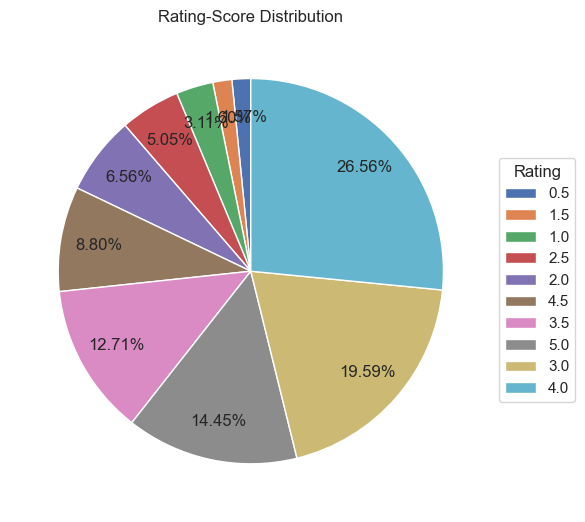

In [19]:
#Plot the pie chart of the result

plt.figure(figsize=(6,6))
plt.pie(rating_counts['percent'], 
        autopct="%.2f%%",  # The digits after zero in percentage
        startangle=90,    # The starting position of the pie angle
        pctdistance=0.8   # Distance from the center of the pie to the percentage number
       )

plt.title("Rating-Score Distribution")  
plt.legend(rating_counts['rating'],
           title="Rating",
           bbox_to_anchor=(1, 0.75)    # position of the legend next to the figure (horizontal, vertical). The value is between 0 and 1.
           )
plt.tight_layout()
plt.show()

In [21]:
# The slices of some percentages are too small, causing overlap in the area of the pie chart. 
# We then eliminate the percentages which are too small, and keep only those which are larger than 5%.

rating_counts = (
    ratings["rating"]
        .value_counts(normalize=True)    # convert to percentage 
        .sort_index()   # order from low to high
        .reset_index(name='percent')
)

rating_counts = rating_counts[rating_counts['percent']>0.05]

### Practice: What is the frequency of each tag from the dataset?

In [22]:
# Insert your code here
frequent_tags_count = (
    frequent_tags["count"]
        .value_counts(normalize=True)    # how many times 0.5, 1.0, 1.5, …
        .reset_index(name='percent')
        .sort_values('percent', ascending=True)
)

frequent_tags_count

,count,percent
0,8330,0.066667
1,6516,0.066667
2,5907,0.066667
3,5702,0.066667
4,5326,0.066667
5,5079,0.066667
6,4820,0.066667
7,4738,0.066667
8,4526,0.066667
9,4257,0.066667


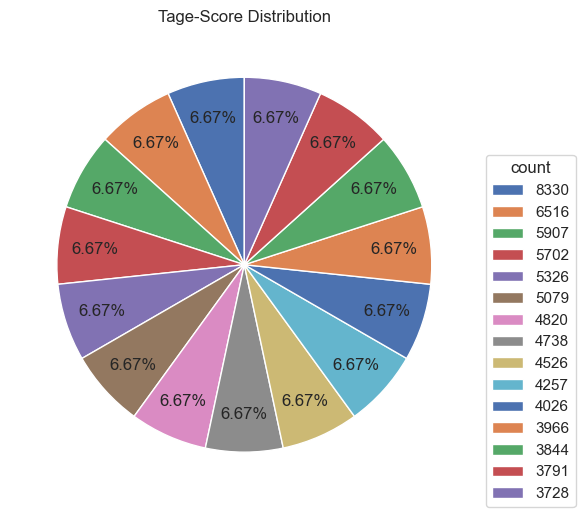

In [23]:
#Plot the pie chart of the result

plt.figure(figsize=(6,6))
plt.pie(frequent_tags_count['percent'], 
        autopct="%.2f%%",  # The digits after zero in percentage
        startangle=90,    # The starting position of the pie angle
        pctdistance=0.8   # Distance from the center of the pie to the percentage number
       )

plt.title("Tage-Score Distribution")  
plt.legend(frequent_tags_count['count'],
           title="count",
           bbox_to_anchor=(1, 0.75)    # position of the legend next to the figure (horizontal, vertical). The value is between 0 and 1.
           )
plt.tight_layout()
plt.show()

## 3. Line Chart

### What is the trend of the tagging process during this period of time in the dataset?

In [24]:
ratings["date"] = pd.to_datetime(ratings["timestamp"], unit="s")


In [87]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')

ratings.head()

,userId,movieId,rating,timestamp,date
0,1,296,5.0,1147880044,2006-05-17 15:34:04
1,1,306,3.5,1147868817,2006-05-17 12:26:57
2,1,307,5.0,1147868828,2006-05-17 12:27:08
3,1,665,5.0,1147878820,2006-05-17 15:13:40
4,1,899,3.5,1147868510,2006-05-17 12:21:50


In [ ]:
ratings['month'] = ratings['date'].dt.month
ratings['year'] = ratings['date'].dt.year

In [96]:
ratings.head()

,userId,movieId,rating,timestamp,date,month,year
0,1,296,5.0,1147880044,2006-05-17 15:34:04,5,2006
1,1,306,3.5,1147868817,2006-05-17 12:26:57,5,2006
2,1,307,5.0,1147868828,2006-05-17 12:27:08,5,2006
3,1,665,5.0,1147878820,2006-05-17 15:13:40,5,2006
4,1,899,3.5,1147868510,2006-05-17 12:21:50,5,2006


In [25]:
# 2)  Resample directly on that column (no set_index, no assign)
monthly = (
    ratings
      .resample("M", on="date")    # 'M' = calendar month
      ["rating"]
      .count()                      # count rows in each bin
      .reset_index(name="num_ratings")
)

print(monthly.head())

/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_8394/3101250509.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M", on="date")    # 'M' = calendar month


        date  num_ratings
0 1995-01-31            3
1 1995-02-28            0
2 1995-03-31            0
3 1995-04-30            0
4 1995-05-31            0


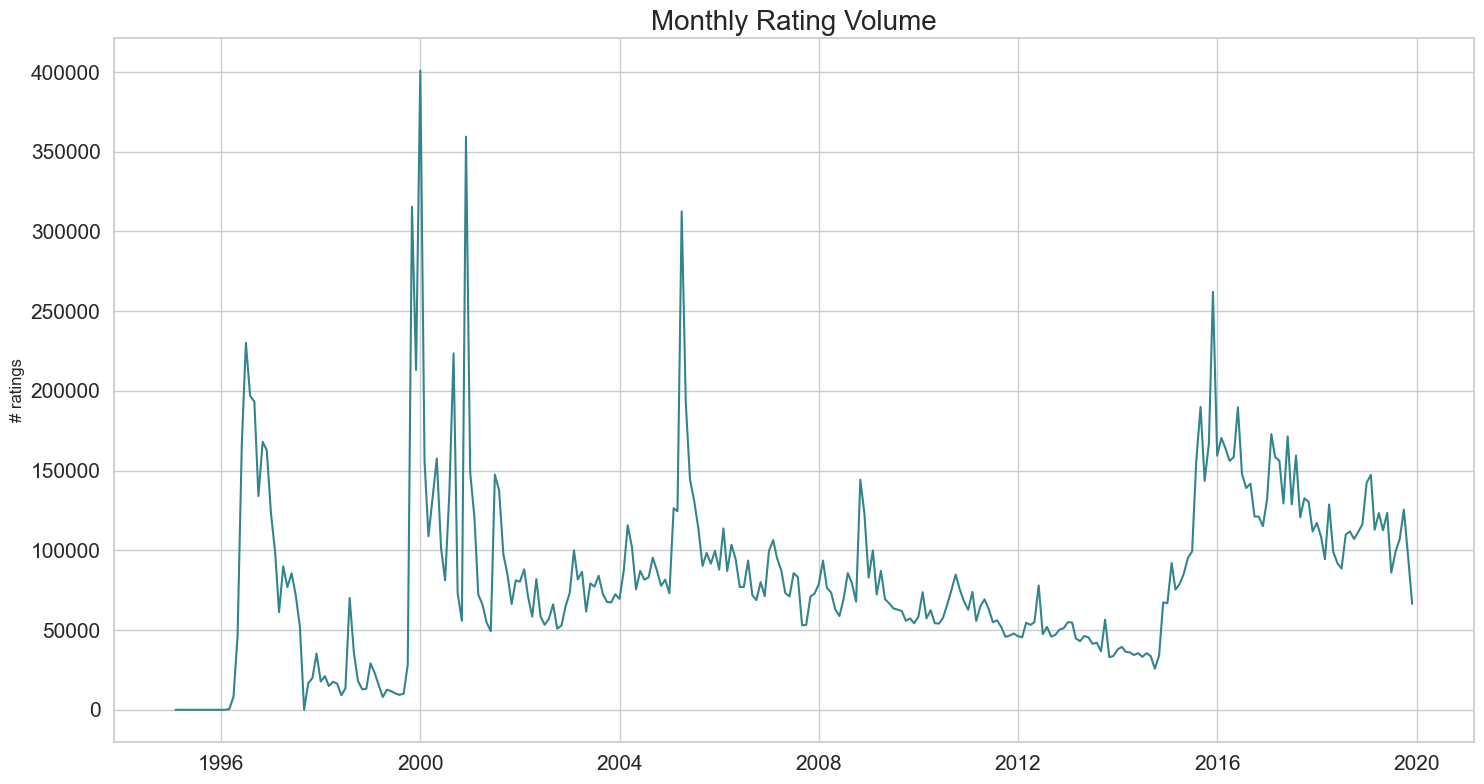

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly, x='date', y='num_ratings', color=one_colour)
plt.title('Monthly Rating Volume', fontsize=20)
plt.xlabel('', fontsize=12)
plt.ylabel('# ratings', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


### Practice: How about the trend of the tagging process?

In [29]:
# Insert your code here


tags["date"] = pd.to_datetime(tags["timestamp"], unit="s")
tags.head()

,userId,movieId,tag,timestamp,date
0,3,260,classic,1439472355,2015-08-13 13:25:55
1,3,260,sci-fi,1439472256,2015-08-13 13:24:16
2,4,1732,dark comedy,1573943598,2019-11-16 22:33:18
3,4,1732,great dialogue,1573943604,2019-11-16 22:33:24
4,4,7569,so bad it's good,1573943455,2019-11-16 22:30:55


In [35]:
# Insert your code here
monthly_tags = (
    tags
      .resample("M", on="date")    # 'M' = calendar month
      ["tag"]
      .count()                      # count rows in each bin
      .reset_index(name="num_tags")
)

print(monthly_tags.head())

/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_8394/3284782117.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M", on="date")    # 'M' = calendar month


        date  num_tags
0 2005-12-31        27
1 2006-01-31      6262
2 2006-02-28      4711
3 2006-03-31      2390
4 2006-04-30      2028


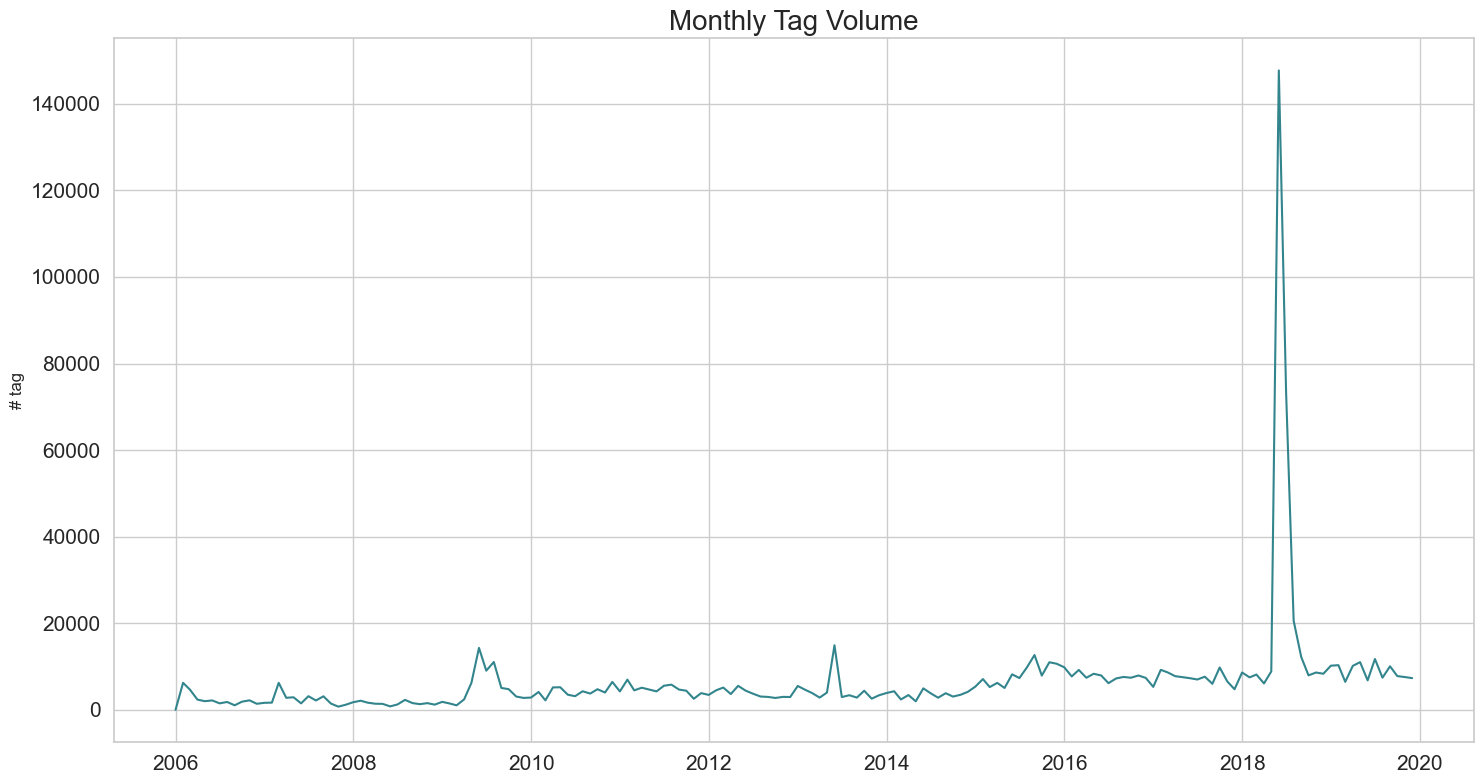

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly_tags, x='date', y='num_tags', color=one_colour)
plt.title('Monthly Tag Volume', fontsize=20)
plt.xlabel('', fontsize=12)
plt.ylabel('# tag', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


## 4. Scatterplot

### Find the relationship between user tagging activity (number of tags made by each user) and his/her average rating.

In [38]:
lemonade = pd.read_csv('Lemonade.csv')

lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


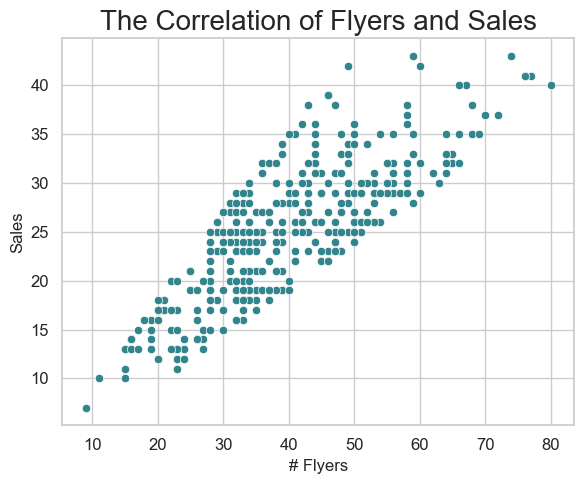

In [39]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=lemonade, 
                x='Flyers', 
                y='Sales', 
                color=one_colour)
plt.title('The Correlation of Flyers and Sales', fontsize=20)
plt.xlabel('# Flyers', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Practice: What is the correlation of temperature amount with the sales ?

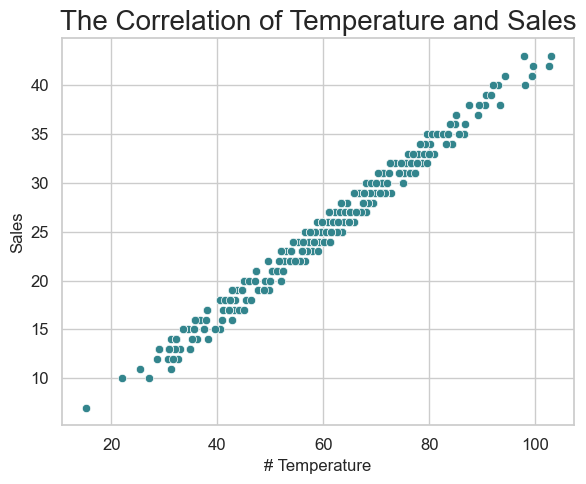

In [44]:
# Insert your code here

plt.figure(figsize=(6,5))
sns.scatterplot(data=lemonade, 
                x='Temperature', 
                y='Sales', 
                color=one_colour)
plt.title('The Correlation of Temperature and Sales', fontsize=20)
plt.xlabel('# Temperature', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Practice: What is the correlation of rainfall amount with the sales ?

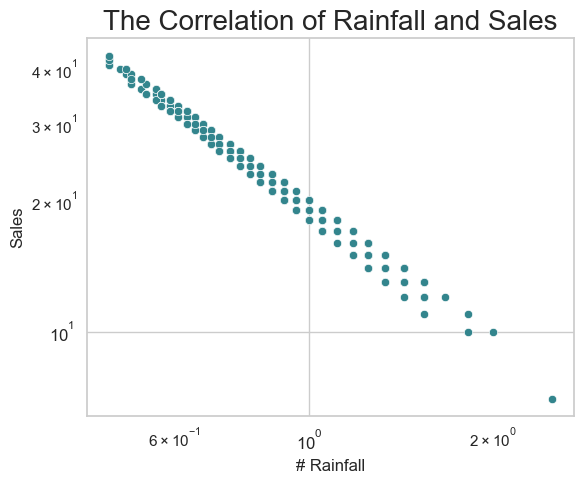

In [46]:
# Insert your code here

plt.figure(figsize=(6,5))
sns.scatterplot(data=lemonade, 
                x='Rainfall', 
                y='Sales', 
                color=one_colour)
plt.title('The Correlation of Rainfall and Sales', fontsize=20)
plt.xlabel('# Rainfall', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.xscale('log')  # Logarithmic scale for better visibility
plt.yticks(fontsize=12)
plt.yscale('log')  # Logarithmic scale for better visibility
plt.tight_layout()
plt.show()

In [47]:
lemonade.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [49]:
lemonade[['Temperature', 'Rainfall', 'Flyers', 'Sales']].corr()

,Temperature,Rainfall,Flyers,Sales
Temperature,1.000000,-0.902859,0.797719,0.989832
Rainfall,-0.902859,1.000000,-0.747389,-0.909214
Flyers,0.797719,-0.747389,1.000000,0.805183
Sales,0.989832,-0.909214,0.805183,1.000000


## 5. Grouped Bar Chart

### What is the number of sales by months for each price?

In [50]:
sales_by_price = (
    lemonade.groupby(['Price','Day'], as_index=False)
           .agg(Num_sales=('Sales','sum'))
           .sort_values('Num_sales', ascending=False)
)

sales_by_price

,Price,Day,Num_sales
0,0.3,Friday,1056
6,0.3,Wednesday,1037
4,0.3,Thursday,1033
1,0.3,Monday,1025
3,0.3,Sunday,1020
5,0.3,Tuesday,1012
2,0.3,Saturday,1006
9,0.5,Saturday,312
11,0.5,Thursday,302
8,0.5,Monday,299


/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_8394/3997540642.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=sales_by_price, x='Day', y='Num_sales', hue='Price',


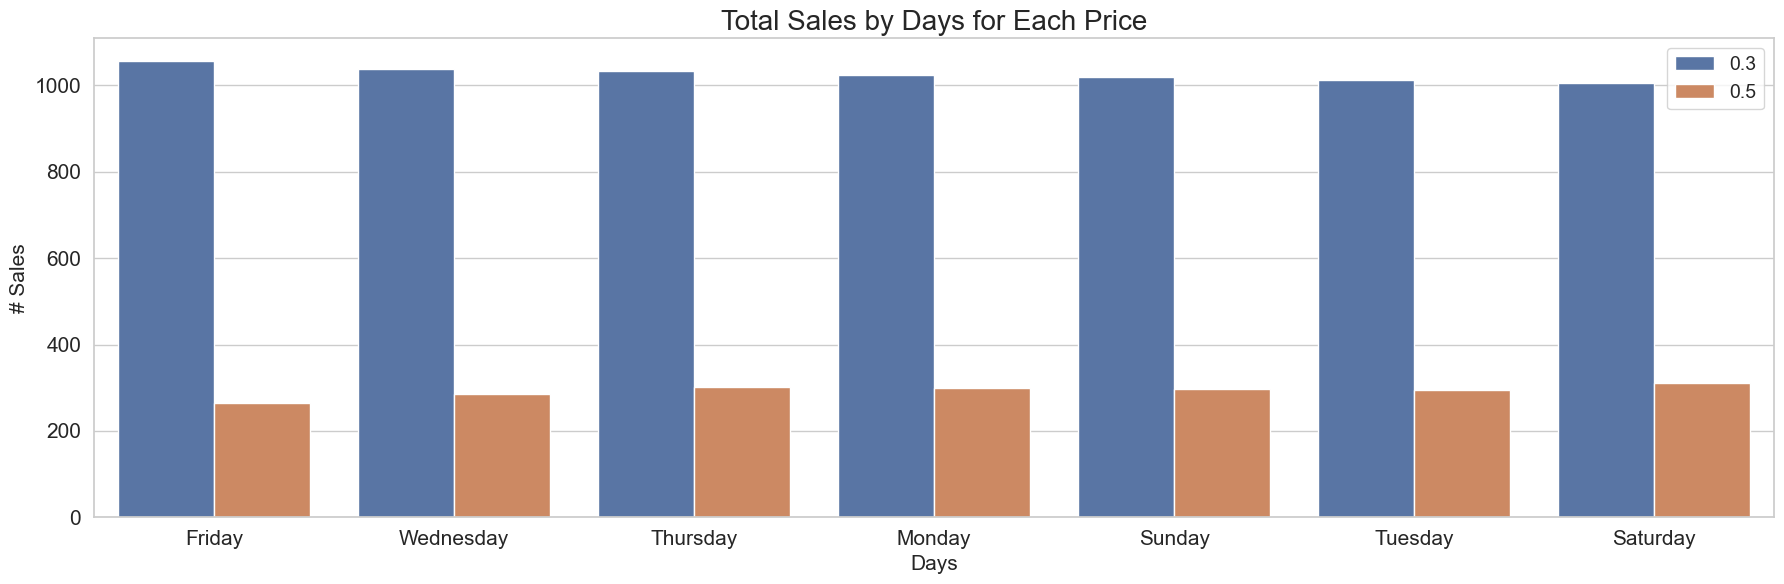

In [55]:
colors = sns.color_palette()

plt.figure(figsize=(18,6))
sns.barplot(data=sales_by_price, x='Day', y='Num_sales', hue='Price',
                 palette=colors)
plt.title('Total Sales by Days for Each Price', fontsize=20)
plt.xlabel('Days', fontsize=15)
plt.ylabel('# Sales', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


### Practice: What is the average revenue by days for each price?

In [ ]:
# Insert your code here
average_sales_by_price = (lemonade.groupby(['Price','Day'], as_index=False)
           .agg(Avg_sales=('Sales','mean'))
           .sort_values('Avg_sales', ascending=False)
)

average_sales_by_price

,Price,Day,Avg_sales
9,0.5,Saturday,34.666667
11,0.5,Thursday,33.555556
8,0.5,Monday,33.222222
7,0.5,Friday,33.000000
10,0.5,Sunday,32.888889
12,0.5,Tuesday,32.777778
13,0.5,Wednesday,31.777778
6,0.3,Wednesday,24.116279
4,0.3,Thursday,24.023256
0,0.3,Friday,24.000000


/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_8394/1034263210.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=average_sales_by_price, x='Day', y='Avg_sales', hue='Price',


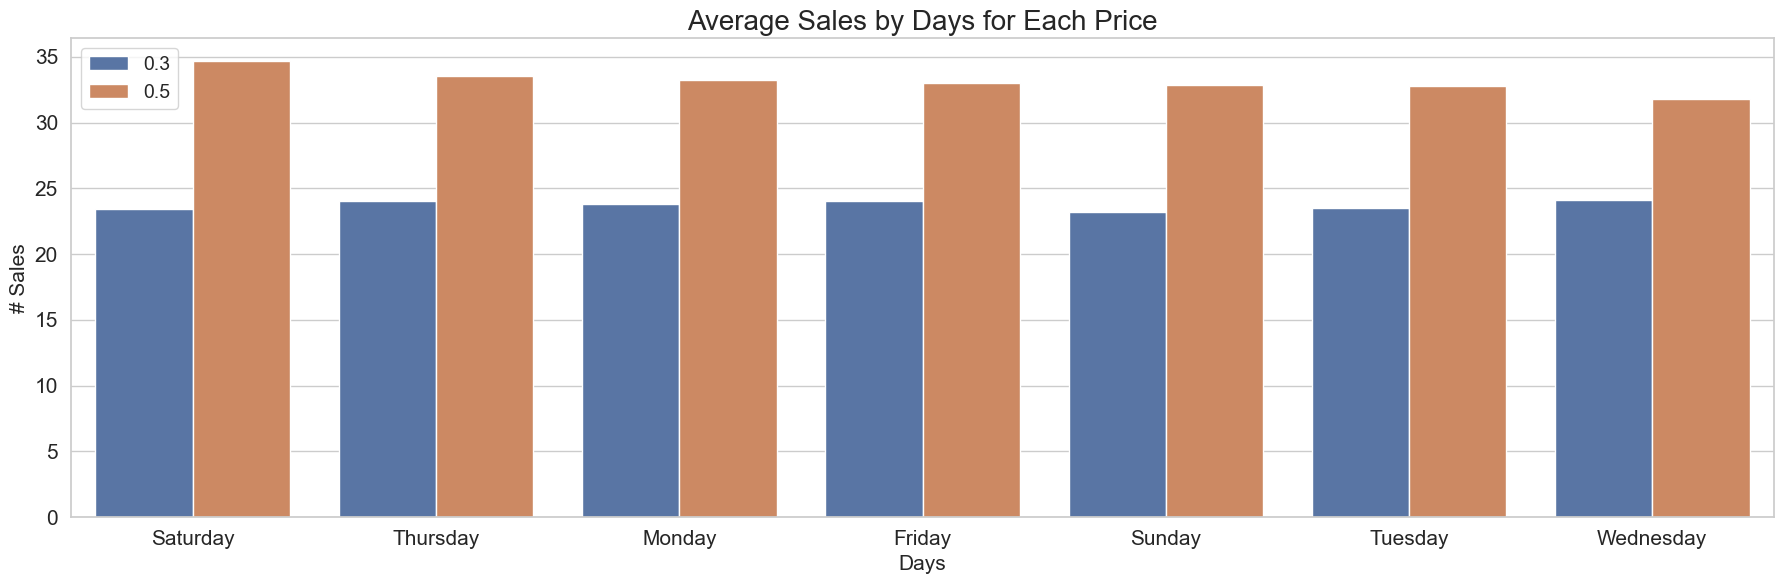

In [59]:
# Insert your code here
colors = sns.color_palette()

plt.figure(figsize=(18,6))
sns.barplot(data=average_sales_by_price, x='Day', y='Avg_sales', hue='Price',
                 palette=colors)
plt.title('Average Sales by Days for Each Price', fontsize=20)
plt.xlabel('Days', fontsize=15)
plt.ylabel('# Sales', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


In [61]:
# Insert your code here
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,January
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,January
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,January
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,January
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,January


Despite having a large sum of sales for the price of 0.3, the average revenue of the price 0.3 is significantly lower than that of 0.5. We want to dig deeper into this matter to find the reason.

### What is the total sales in each month for each price?

In [62]:
#Extract months from the Date column

lemonade['Date'] = pd.to_datetime(lemonade['Date'],
                                  format='%d/%m/%Y',
                                  dayfirst=True)      

lemonade['Month'] = lemonade['Date'].dt.month_name()    #lemonade['Date'].dt.month : only extract month number

In [65]:
# Insert your code here
sales_by_price = (
    lemonade.groupby(['Price', 'Month'], as_index=False)
    .agg(sum_sales=('Sales', 'sum'))
    .sort_values('sum_sales', ascending=False)
)
sales_by_price

,Price,Month,sum_sales
11,0.5,July,1113
4,0.3,June,1056
10,0.5,August,941
6,0.3,May,915
9,0.3,September,812
0,0.3,April,786
8,0.3,October,765
5,0.3,March,742
7,0.3,November,632
2,0.3,February,557


/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_8394/3564276356.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=sales_by_price, x='Month', y='sum_sales', hue='Price',


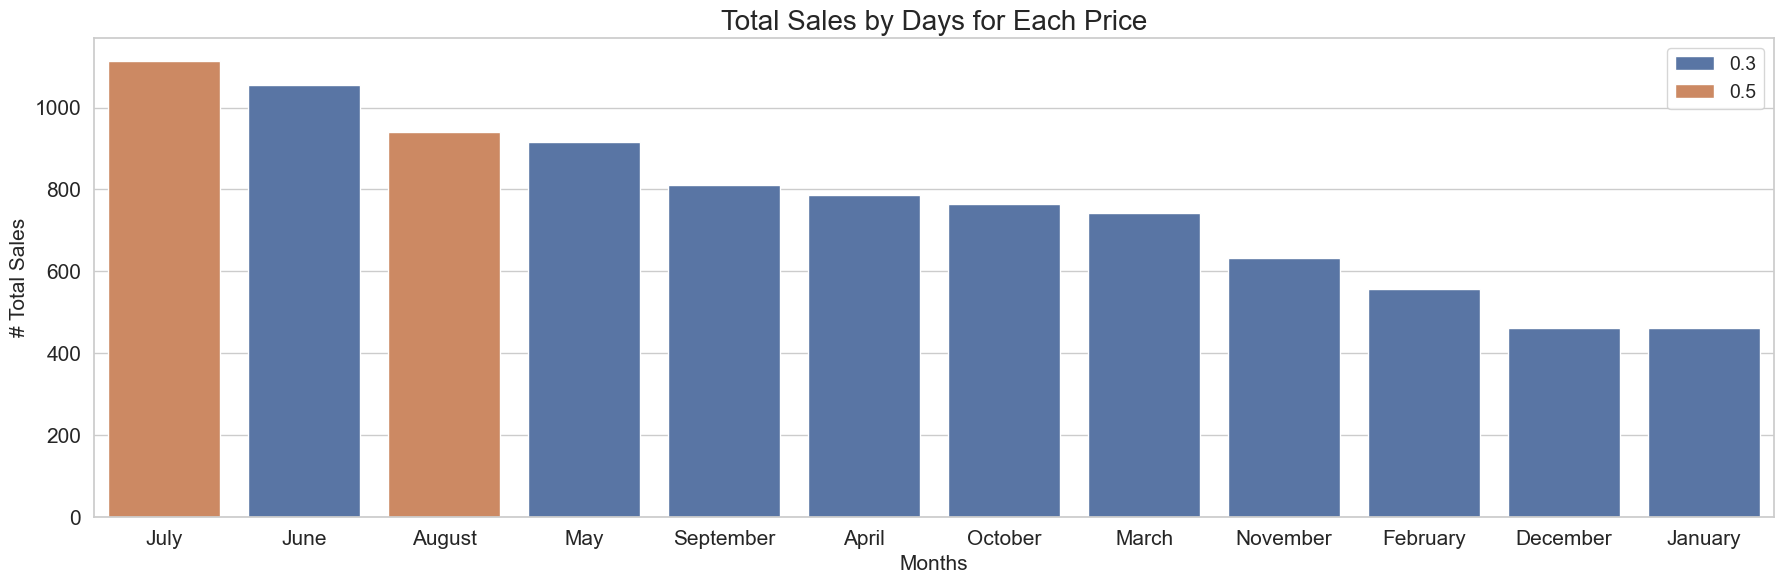

In [68]:
# Insert your code here
colors = sns.color_palette()

plt.figure(figsize=(18,6))
sns.barplot(data=sales_by_price, x='Month', y='sum_sales', hue='Price',
                 palette=colors)
plt.title('Total Sales by Days for Each Price', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('# Total Sales', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


They sell the drinks at the price 0.5$ only in July and August, and it was the months with the highest total sales. That was why it has higher average, but lower sum of sales.

## 6. Box Plot

### What are the central tendency and variability of sales in each month?

In [69]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,January
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,January
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,January
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,January
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,January


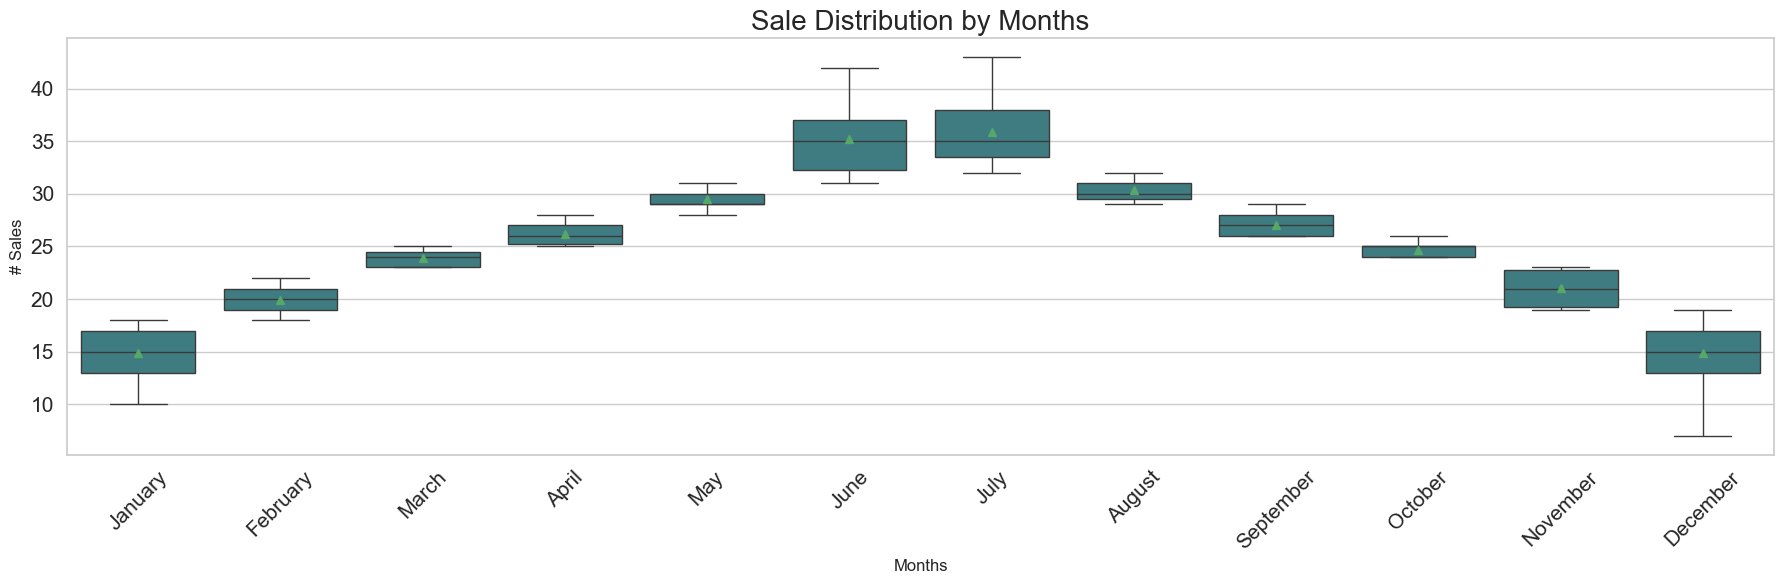

In [70]:
plt.figure(figsize=(18,6))
sns.boxplot(data=lemonade, x='Month', y='Sales', color=one_colour, showmeans=True)
plt.title('Sale Distribution by Months', fontsize=20)
plt.xlabel('Months', fontsize=12)
plt.ylabel('# Sales', fontsize=12)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


### Practice: What are the central tendency and variability of flyer distribution in each month?

In [ ]:
# Insert your code here

## 7.  Histogram 

### What does the frequency distribution of sales look like?

In [72]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,January
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,January
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,January
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,January
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,January


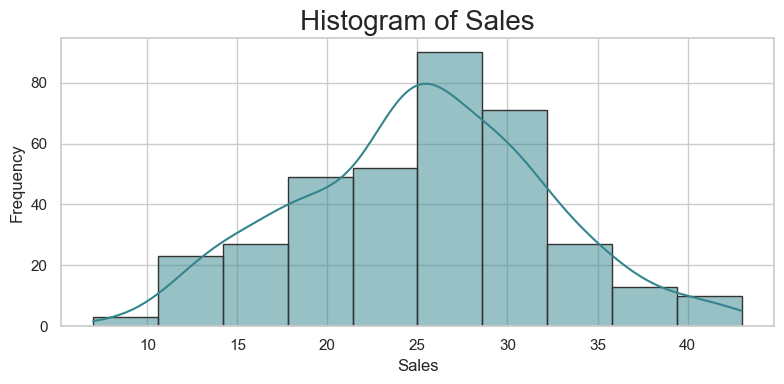

In [75]:
plt.figure(figsize=(8,4))
sns.histplot(lemonade['Sales'], bins=10, color=one_colour, edgecolor='0.2', kde=True) 
# "bin" is the number of bars, set "kde" to True to show the line representation.
plt.title('Histogram of Sales', fontsize=20)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


### Practice: What does the frequency distribution of rainfall and flyers look like?

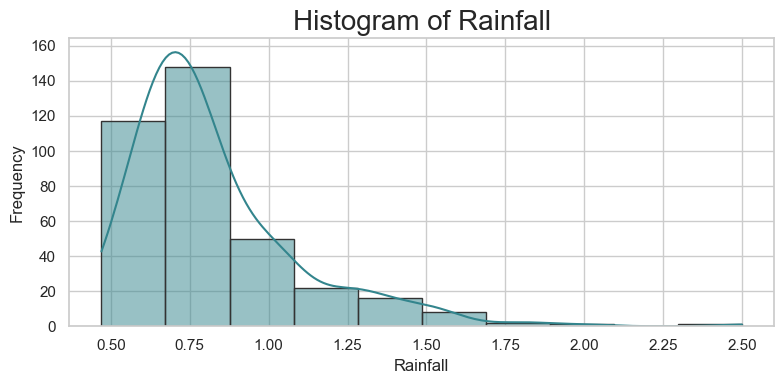

In [78]:
# Insert your code here for rainfall

plt.figure(figsize=(8,4))
sns.histplot(lemonade['Rainfall'], bins=10, color=one_colour, edgecolor='0.2', kde=True) 
# "bin" is the number of bars, set "kde" to True to show the line representation.
plt.title('Histogram of Rainfall', fontsize=20)
plt.xlabel('Rainfall', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

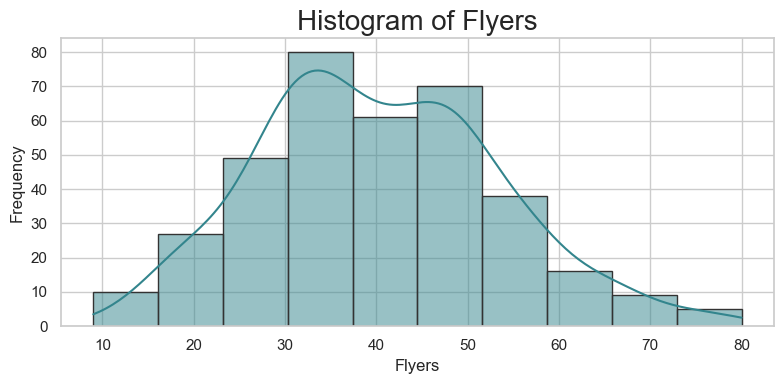

In [79]:
# Insert your code here for flyers
plt.figure(figsize=(8,4))
sns.histplot(lemonade['Flyers'], bins=10, color=one_colour, edgecolor='0.2', kde=True) 
# "bin" is the number of bars, set "kde" to True to show the line representation.
plt.title('Histogram of Flyers', fontsize=20)
plt.xlabel('Flyers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

### Now, let's combine the three figures into one. 

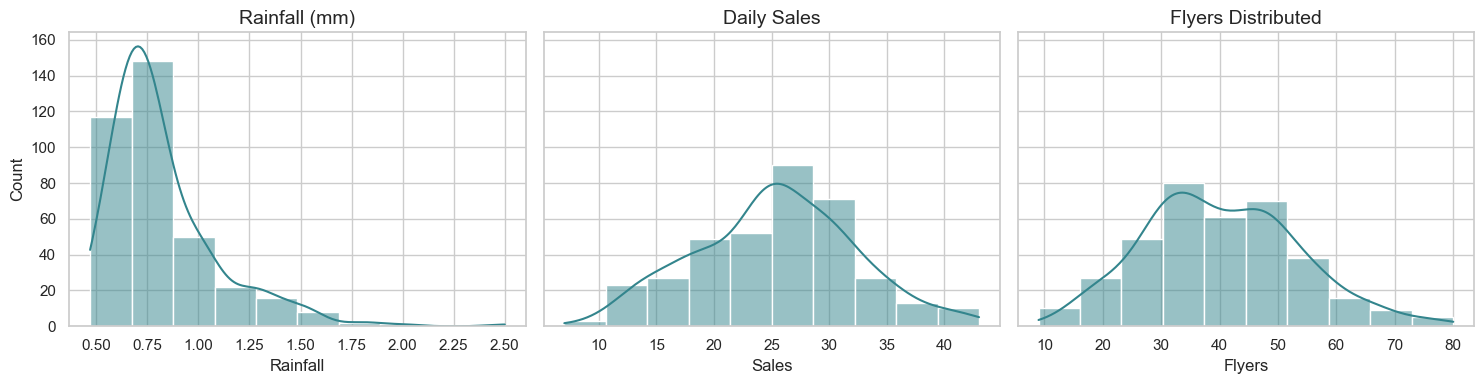

In [81]:

categories = ['Rainfall', 'Sales', 'Flyers']
titles  = ['Rainfall (mm)', 'Daily Sales', 'Flyers Distributed']


#Create three subplots with 1 row and 3 columns
# figsize is the size of the entire figure. Set sharey=True if you want to use only one y-axis label for all graphs
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True) 

#Draw histogram in each subplot
for ax, category, title in zip(axes, categories, titles):
    sns.histplot(
        data=lemonade,
        x=category,
        bins=10,  
        color=one_colour,
        ax=ax  # assign the figure 
        ,kde=True
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(category, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

fig.tight_layout()
plt.show()
